In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
#import matplotlib.pyplot as plt

# Recipe data exploration

In [54]:
recipes = pd.read_csv('data/RAW_recipes.csv')
recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


Things to do:
- Minutes analysis (done)
- amount of recipes submitted over time
- nutrition explosion 
    - nutrition is also as a percentage of daily value
- n_steps visualization
- ingredients visualization
- steps preprocessing
    - can we figure out what is needed in each of these (oven, toaster, masher, etc) ?

Note: nutrition takes order of (calories, fats, sugars, sodium, protein, saturated fat, carbs)

## Minutes analysis

We can see how many minutes a recipe takes, and see whether we can find what makes a recipe take a long time.

In [55]:
recipes.minutes.describe() # Sanity check for extreme values

count    2.316370e+05
mean     9.398546e+03
std      4.461963e+06
min      0.000000e+00
25%      2.000000e+01
50%      4.000000e+01
75%      6.500000e+01
max      2.147484e+09
Name: minutes, dtype: float64

In [56]:
recipes.sort_values('minutes').iloc[-5:]

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
106963,homemade vanilla,425681,259205,28177,2010-05-16,"['time-to-make', 'preparation', '5-ingredients...","[69.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",9,['slice the vanilla beans length-wise and scra...,found this recipe on tammy's blog (http://www....,"['vanilla beans', 'vodka']",2
38116,celtic druid s honey mead meade metheglin,216215,259260,242729,2007-03-11,"['time-to-make', 'course', 'main-ingredient', ...","[531.0, 0.0, 561.0, 1.0, 1.0, 0.0, 47.0]",18,"['equipement:', 'very large pan - to hold 12 p...","mead, made from fermented honey, was the earli...","['gingerroot', 'lemons, juice and rind of', 'w...",7
106563,homemade fruit liquers,291571,288000,553251,2008-03-12,"['time-to-make', 'course', 'main-ingredient', ...","[836.2, 0.0, 333.0, 0.0, 0.0, 0.0, 27.0]",12,"['rinse the fruit or berries , fruit must be c...",this should be a nice easy project for those w...,"['berries', 'vodka', 'granulated sugar']",3
109624,how to preserve a husband,447963,1051200,576273,2011-02-01,"['time-to-make', 'course', 'preparation', 'for...","[407.4, 57.0, 50.0, 1.0, 7.0, 115.0, 5.0]",9,"['be careful in your selection', ""don't choose...","found this in a local wyoming cookbook ""a coll...","['cream', 'peach']",2
144074,no bake granola balls,261647,2147483647,464080,2007-10-26,"['60-minutes-or-less', 'time-to-make', 'course...","[330.3, 23.0, 110.0, 4.0, 15.0, 24.0, 15.0]",9,"['preheat the oven to 350 degrees', 'spread oa...",healthy snacks that kids (and grown ups) will ...,"['rolled oats', 'unsweetened dried shredded co...",8


We obviously see that the granola bars don't take the int max value for minutes, so we will reduce this to 60 minutes as suggested by the tags.

In [67]:
recipes.loc[144074, 'minutes'] = 60

In [68]:
# Convert minutes to 1, as a recipe cannot technically have "0" minutes (and also works well for log transforms)
recipes.loc[recipes.minutes == 0, 'minutes'] = 1

Text(0.5, 1.0, 'Minutes (logged) histogram counts per recipe')

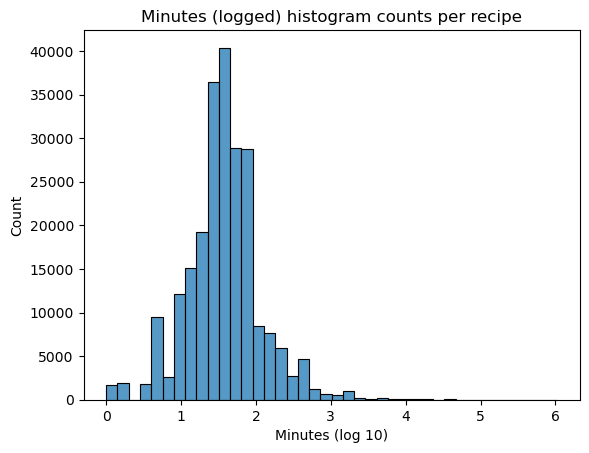

In [75]:
ax = sns.histplot(recipes.minutes.apply(np.log10), bins = 40);
ax.set_xlabel('Minutes (log 10)')
ax.set_title('Minutes (logged) histogram counts per recipe')

From this, we see that there is some average of recipes to be less than 100 minutes or so. We also cannot assume a normal distribution given the apparent skew of the histogram. We can however bootstrap in order to gain estimates from median recipe times.

In [72]:
recipes.minutes.describe()

count    2.316380e+05
mean     1.276499e+02
std      2.946331e+03
min      1.000000e+00
25%      2.000000e+01
50%      4.000000e+01
75%      6.500000e+01
max      1.051200e+06
Name: minutes, dtype: float64

In [96]:
n_trials, sample_size = 1000, 10000
boot_med = np.zeros(n_trials)
for i in range(n_trials):
    boot_med[i] = recipes.sample(sample_size).minutes.median()

38.541


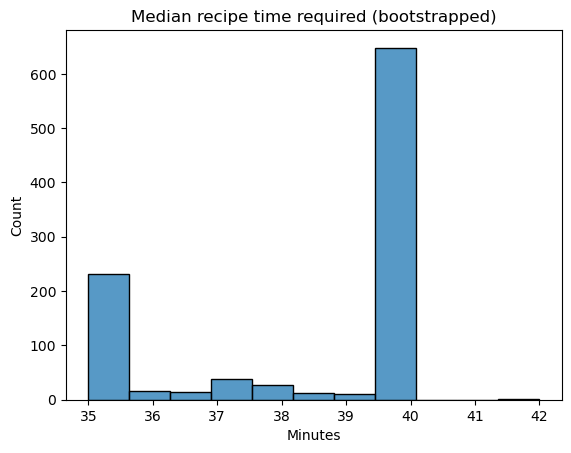

In [104]:
ax = sns.histplot(boot_med)
ax.set_title('Median recipe time required (bootstrapped)')
ax.set_xlabel('Minutes');
print(np.mean(boot_med))

We see that about 50% of the recipes do take less than 40 minutes, although this is not the average.

# Recipes submitted over time
Firstly, we should convert submitted to a datetime format:

In [108]:
recipes.submitted = pd.to_datetime(recipes.submitted)

In [113]:
recipes.submitted

0        2005-09-16
1        2002-06-17
2        2005-02-25
3        2003-04-14
4        2002-10-25
            ...    
231632   2012-08-29
231633   2013-01-09
231634   2008-06-07
231635   2008-04-15
231636   2008-04-15
Name: submitted, Length: 231637, dtype: datetime64[ns]

In [118]:
sns.histplot?

In [122]:
recipes.submitted.dt.year.unique()

array([2005, 2002, 2003, 1999, 2001, 2004, 2008, 2007, 2011, 2006, 2012,
       2013, 2015, 2010, 2009, 2014, 2018, 2017, 2000, 2016], dtype=int64)

In [134]:
year_stats = recipes.submitted.dt.year.describe()
year_bins = np.arange(year_stats['min'], year_stats['max'] + 1)
#year_bins = list(zip(year_bins, year_bins + .99))
#year_bins

Text(0, 0.5, 'Recipes')

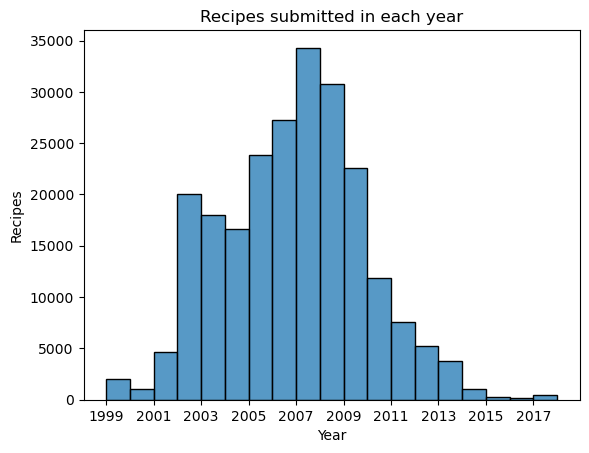

In [142]:
ax = sns.histplot(recipes.submitted.dt.year, bins=year_bins)
ax.set_xticks(year_bins[::2]);
ax.set_title('Recipes submitted in each year')
ax.set_xlabel('Year')
ax.set_ylabel('Recipes')

We see that the data is not up to date, but does capture about 19 years of recipes uploaded to Food.com. We also look at when recipes are usually uploaded:

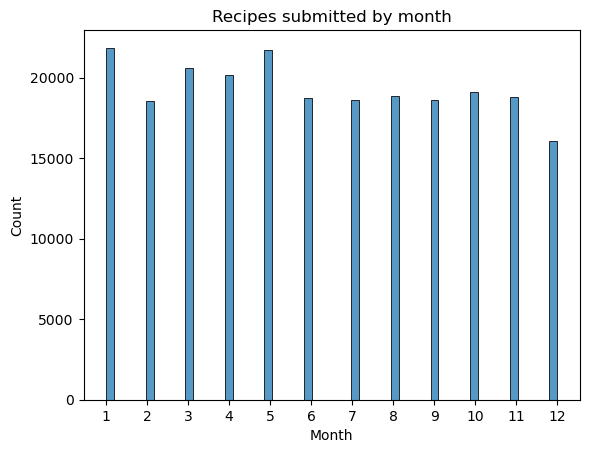

In [151]:
ax = sns.histplot(recipes.submitted.dt.month)
ax.set_xlabel('Month')
ax.set_xticks(range(1,13))
ax.set_title('Recipes submitted by month');

We see that there is little to no variance in the recipes submitted dependent on month, but we are skeptical that this is the case. We can test this with a hypothesis test:
 - H0: The chance for a recipe to be published in a month is the same for every month ($P_1 = P_2 = \ldots = P_{12} = \frac{1}{12}$) ($p_{val} > \alpha$)
 - H1: The chance for a recipe to be published in the month is not the same for every month. ($p_{val} \leq  \alpha$)
 - P_value is $\alpha = .5$

We can test this using samples and [total variation distance](https://www.educative.io/answers/what-is-total-variation-tv-distance).

In [225]:
observed = recipes.submitted.dt.month.value_counts(normalize=True)
observed # What we observe in our sample

1     0.094355
5     0.093612
3     0.088807
4     0.087145
10    0.082590
8     0.081446
11    0.081036
6     0.080842
9     0.080432
7     0.080229
2     0.080022
12    0.069484
Name: submitted, dtype: float64

In [226]:
expected = pd.Series(index=range(1,13), data=(1 / 12))
expected # What we expect the sample to be

1     0.083333
2     0.083333
3     0.083333
4     0.083333
5     0.083333
6     0.083333
7     0.083333
8     0.083333
9     0.083333
10    0.083333
11    0.083333
12    0.083333
dtype: float64

In [228]:
observed_val = ((observed - expected).abs() / 2).sum()
observed_val # Observed TVD (our test statistic)

0.030585211631417544

In [231]:
n_samples = recipes.shape[0]
samples = np.random.multinomial(n_samples, [1/12]*12, size=10000) / n_samples
tvd_samples = np.sum(np.abs(samples - np.array(expected)) / 2, axis=1)
tvd_samples[:10] # TVD Distribution

array([0.00197112, 0.0027043 , 0.00222942, 0.00358535, 0.0027133 ,
       0.00231612, 0.00269171, 0.00250967, 0.00244204, 0.00289857])

In [232]:
# P_value computation
p_val = np.mean(tvd_samples > observed_val)
p_val

0.0

We see that not a single sample had a higher TVD than our observed value, and we get an extremely low p_value. By this result, we believe that it is not likely that every month has the same chance for a recipe to be published. 

In a real-life application, we may believe that the amount published can decrease or increase on certain months, and thus optimize how many servers can handle post and get requests, eikther decreasing the server costs or electricity costs.

## Nutrition explosion

The nutrition column is very dirty and can be expanded and cleaned up a little bit.